In [ ]:
class Image:
  import numpy as np
  def __init__(self,data: np.ndarray):
    self.data = data
    self.height = data.shape[0]
    self.width = data.shape[1]
    self.datatype = data.dtype

  def is_grayscale(self):
    return len(self.data.shape)==2

  def imshow(self):
    import matplotlib.pyplot as plt
    if (self.is_grayscale()):
      plt.imshow(self.data, cmap="gray")

  def histogram(self,intensity_resolution=8,normalize=False):
    import numpy as np
    if(self.is_grayscale()):
      bins = np.arange(0,2**intensity_resolution,1)
      hist = np.zeros_like(bins) #np.zeros(2**intensity_resolution)
      for i in range(self.height):
        for j in range(self.width):
          hist[self.data[i,j]] = hist[self.data[i,j]]+1
      if(normalize):
        hist = hist/(self.height*self.width)
    return bins,hist

  def plot_histogram(self,intensity_resolution=8,normalize=False):
    import matplotlib.pyplot as plt
    bins,hist = self.histogram(intensity_resolution=intensity_resolution,normalize=normalize)
    plt.plot(bins,hist)

  def cumulative_histogram(self,intensity_resolution=8,normalize=False):
    import numpy as np
    bins,hist=self.histogram(intensity_resolution=intensity_resolution,normalize=normalize)
    cumulative_hist= np.zeros_like(bins)
    cumulative_hist[0]=hist[0]
    for i in range(1,len(hist)):
      cumulative_hist[i]=cumulative_hist[i-1]+hist[i]
    return bins, cumulative_hist

  def plot_cumulative_histogram(self,intensity_resolution=8,normalize=False):
    import matplotlib.pyplot as plt
    bins,hist = self.cumulative_histogram(intensity_resolution=intensity_resolution,normalize=normalize)
    plt.plot(bins,hist)

  def contrast_stretching(self,intensity_resolution=8,normalize=False):
    import numpy as np
    r=self.data/255
    H=np.max(self.data/255)
    L=np.min(self.data/255)
    S=(((1/(H-L))*(r-L))*255).astype(np.uint8)

    return Image(S)

  def power_transform(self,gamma):
    import numpy as np
    r=self.data/255
    r=r**gamma
    c=np.max(r)
    S=r/c

    return Image(S)






In [ ]:
from skimage import data
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
img= data.clock()


In [ ]:
I= Image(img)

In [ ]:
I.width

400

In [ ]:
I.height

300

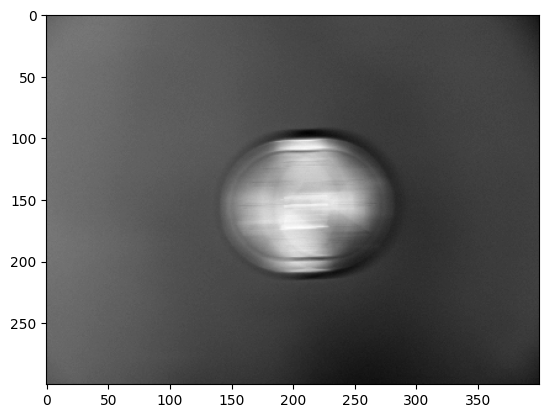

In [ ]:
I.imshow()

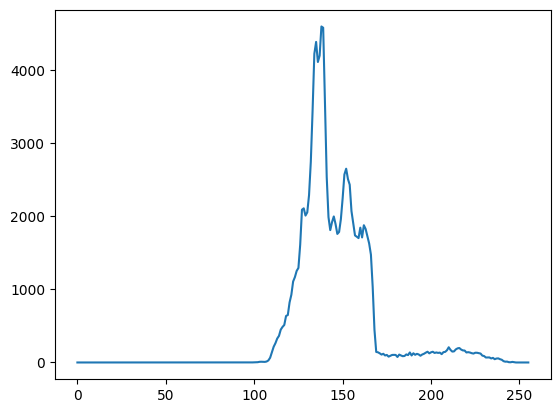

In [ ]:
I.plot_histogram(normalize=False)

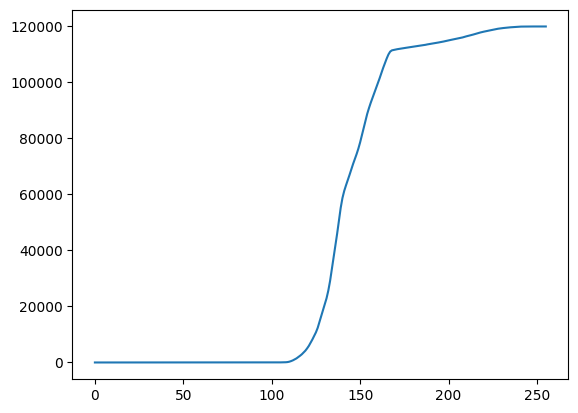

In [ ]:
I.plot_cumulative_histogram(normalize=False)

In [ ]:
I2=I.contrast_stretching()

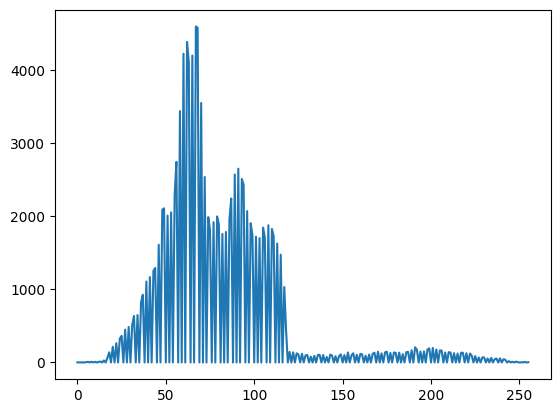

In [ ]:
I2.plot_histogram()

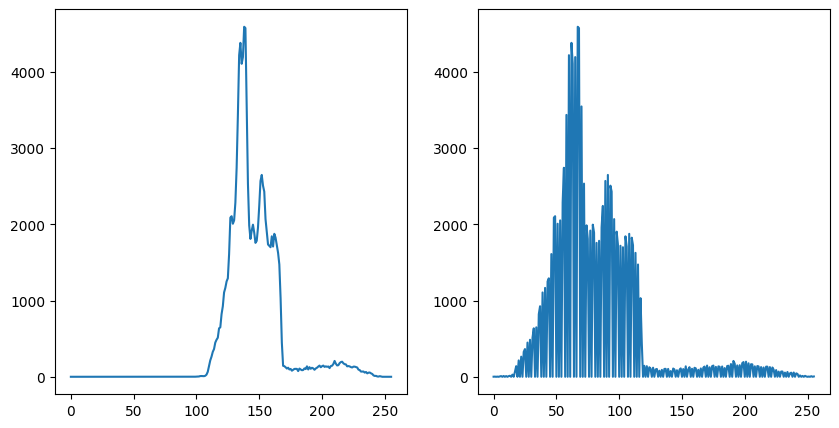

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
I.plot_histogram()

plt.subplot(1,2,2)
I2.plot_histogram()

plt.show()

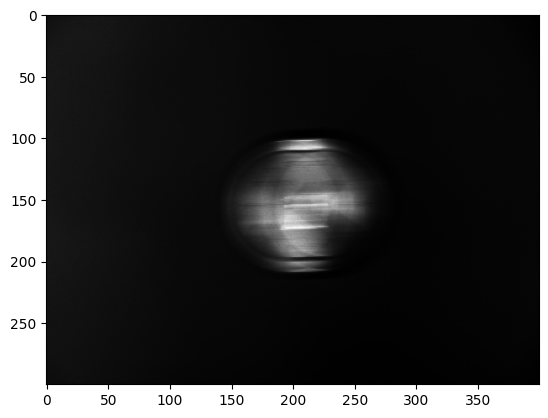

In [ ]:
x=I.power_transform(6)
x.imshow()

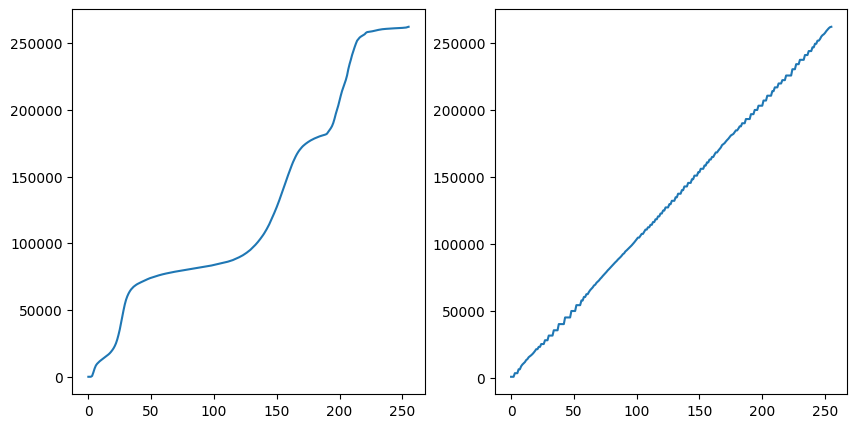

In [ ]:
from skimage import exposure
img=data.camera()
I=Image(img)

img_eq=exposure.equalize_hist(img)
I3=Image((img_eq*255).astype(np.uint8))

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
I.plot_cumulative_histogram()

plt.subplot(1,2,2)
I3.plot_cumulative_histogram()
plt.show()